### Exploratory Data Analysis on the Historical Data 

In [1]:
# Importing the libraries required for analysis and model building
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import simpy as sy
from datetime import datetime
from scipy.stats import f_oneway
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency, pearsonr
from statsmodels.formula.api import ols
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
np.random.seed(1015)

In [3]:
# Reading the raw data and converting it into a dataframe
data_raw = pd.read_csv("Hist2_Dataset.csv")

In [4]:
# Previewing the first 5 columns of the data
data_raw.describe()

,Shoe_ID,Customer_ID,Shoe Size,Price,Quantity Sold
count,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1000.500000,1000.500000,9.39000,181.316595,51.654000
std,577.494589,577.494589,2.74885,96.583607,22.623267
min,1.000000,1.000000,5.00000,19.240000,10.000000
25%,500.750000,500.750000,7.00000,95.665000,35.000000
50%,1000.500000,1000.500000,9.50000,177.530000,47.000000
75%,1500.250000,1500.250000,11.50000,266.737500,71.000000
max,2000.000000,2000.000000,14.00000,349.870000,99.000000


In [5]:
# Checking the data type of the dataframe to see if we have the required data type 
data_raw.dtypes

Shoe_ID                  int64
Customer_ID              int64
Date                    object
Shoe Size              float64
Price                  float64
Promotion Indicator     object
Sales Channel           object
Quantity Sold            int64
dtype: object

In [6]:
# As we assessed our data, we come across the fact that the "Date" column is listed as an object rather than a datetime 
# data type. We utilize Datetime to change the format of the column
data_raw["Date"] = pd.to_datetime(data_raw["Date"])

In [7]:
data_raw.dtypes

Shoe_ID                         int64
Customer_ID                     int64
Date                   datetime64[ns]
Shoe Size                     float64
Price                         float64
Promotion Indicator            object
Sales Channel                  object
Quantity Sold                   int64
dtype: object

In [8]:
# Basic Statistics of Numerical Columns
data_raw.describe()

,Shoe_ID,Customer_ID,Date,Shoe Size,Price,Quantity Sold
count,2000.000000,2000.000000,2000,2000.00000,2000.000000,2000.000000
mean,1000.500000,1000.500000,2022-12-29 21:15:07.200000,9.39000,181.316595,51.654000
min,1.000000,1.000000,2022-01-01 00:00:00,5.00000,19.240000,10.000000
25%,500.750000,500.750000,2022-06-24 18:00:00,7.00000,95.665000,35.000000
50%,1000.500000,1000.500000,2023-01-04 00:00:00,9.50000,177.530000,47.000000
75%,1500.250000,1500.250000,2023-07-01 06:00:00,11.50000,266.737500,71.000000
max,2000.000000,2000.000000,2023-12-31 00:00:00,14.00000,349.870000,99.000000
std,577.494589,577.494589,NaN,2.74885,96.583607,22.623267


In [9]:
# Checking for the missing values 
data_raw.isnull().sum()

Shoe_ID                0
Customer_ID            0
Date                   0
Shoe Size              0
Price                  0
Promotion Indicator    0
Sales Channel          0
Quantity Sold          0
dtype: int64

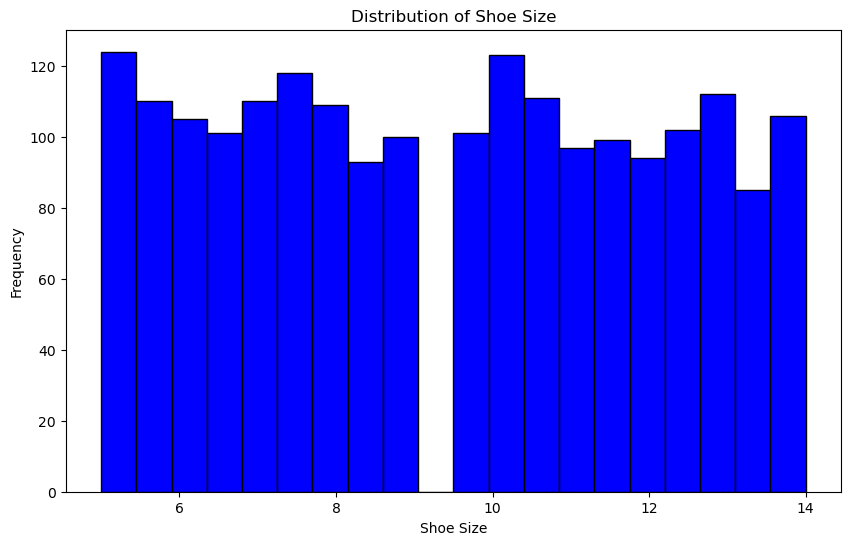

In [10]:
# Histograms for Numerical Columns

# Shoe Size
plt.figure(figsize=(10, 6))
plt.hist(data_raw['Shoe Size'], bins = 20, color='blue', edgecolor = "black")
plt.title('Distribution of Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel("Frequency")
plt.show()


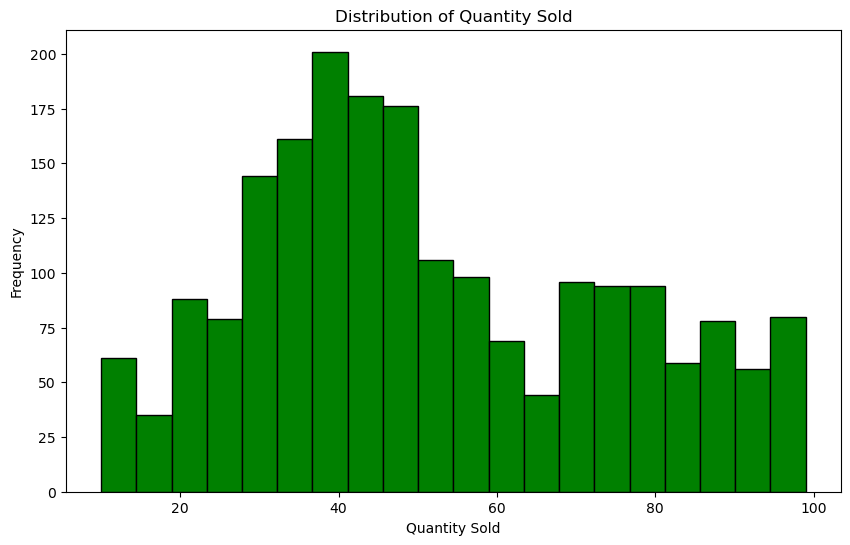

In [11]:
# Quantity Sold
plt.figure(figsize=(10, 6))
plt.hist(data_raw['Quantity Sold'], bins = 20, color='green', edgecolor = "black")
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity Sold')
plt.ylabel("Frequency")
plt.show()

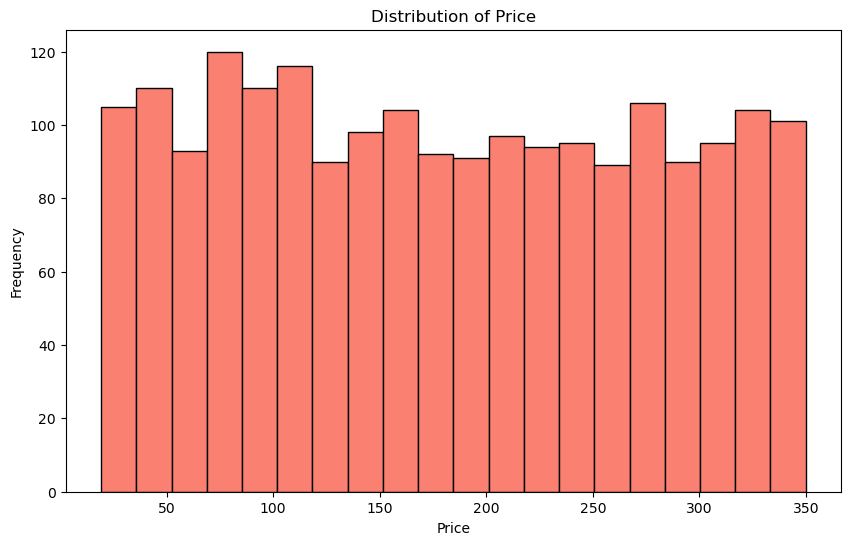

In [12]:
# Price
plt.figure(figsize = (10,6))
plt.hist(data_raw["Price"], bins = 20, color = "salmon", edgecolor = "black")
plt.title("Distribution of Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

In [13]:
# Next, we can use correlation matrix to check if there is any correlation or dependencies between the variables.
correlation = data_raw['Quantity Sold'].corr(data_raw["Price"])
print("Correlation coefficient", correlation)

Correlation coefficient 0.13242336838617777


In [14]:
# Correlation Matrix
numerical_columns = data_raw.select_dtypes(include='number')
correlation_matrix = numerical_columns.corr()

In [15]:
correlation_matrix

,Shoe_ID,Customer_ID,Shoe Size,Price,Quantity Sold
Shoe_ID,1.000000,1.000000,0.011252,-0.012434,-0.006441
Customer_ID,1.000000,1.000000,0.011252,-0.012434,-0.006441
Shoe Size,0.011252,0.011252,1.000000,0.014827,0.370457
Price,-0.012434,-0.012434,0.014827,1.000000,0.132423
Quantity Sold,-0.006441,-0.006441,0.370457,0.132423,1.000000


In [16]:
# Checking for the difference of means
groups = []
for group_name, group_data in data_raw.groupby('Shoe Size'):
    groups.append(group_data["Quantity Sold"])
f_statistic, p = f_oneway(*groups)

In [17]:
p
# Having different means suggest that average values of the groups being compared aren't equal. E.g., comapring sales performance 
# of different shoe sizes with a small p-value suggests that certain shoe sizes are associated with higher or lower sales. 

2.1902452349713316e-67

In [18]:
# Dropping Distinct Values
data_raw['Date'] = data_raw['Date'].drop_duplicates()

In [19]:
# Summary of the dataset after dropping the duplicates
data_raw.describe()

,Shoe_ID,Customer_ID,Date,Shoe Size,Price,Quantity Sold
count,2000.000000,2000.000000,688,2000.00000,2000.000000,2000.000000
mean,1000.500000,1000.500000,2022-12-29 21:41:51.627907072,9.39000,181.316595,51.654000
min,1.000000,1.000000,2022-01-01 00:00:00,5.00000,19.240000,10.000000
25%,500.750000,500.750000,2022-06-30 18:00:00,7.00000,95.665000,35.000000
50%,1000.500000,1000.500000,2022-12-28 12:00:00,9.50000,177.530000,47.000000
75%,1500.250000,1500.250000,2023-06-29 06:00:00,11.50000,266.737500,71.000000
max,2000.000000,2000.000000,2023-12-31 00:00:00,14.00000,349.870000,99.000000
std,577.494589,577.494589,NaN,2.74885,96.583607,22.623267


In [20]:
# Drops the rows where Date is Null
data_raw.dropna(subset=['Date'], inplace=True)

In [21]:
data_raw.describe()

,Shoe_ID,Customer_ID,Date,Shoe Size,Price,Quantity Sold
count,688.000000,688.000000,688,688.000000,688.000000,688.000000
mean,594.130814,594.130814,2022-12-29 21:41:51.627907072,9.478198,182.484317,52.847384
min,1.000000,1.000000,2022-01-01 00:00:00,5.000000,19.240000,10.000000
25%,191.750000,191.750000,2022-06-30 18:00:00,7.000000,100.355000,35.000000
50%,460.000000,460.000000,2022-12-28 12:00:00,9.500000,184.040000,47.500000
75%,896.750000,896.750000,2023-06-29 06:00:00,11.500000,264.240000,73.000000
max,1996.000000,1996.000000,2023-12-31 00:00:00,14.000000,349.350000,99.000000
std,491.220590,491.220590,NaN,2.710477,95.421118,23.033391


In [22]:
# Identifies the shoe size that has the highest total quantity sold
shoe_size_sales = data_raw.groupby('Shoe Size')['Quantity Sold'].sum()
most_sold_size = shoe_size_sales.idxmax()
most_sold_size

14.0

In [23]:
# Promotion applied most shoe size based on quantity sold
promoted_sales_df = data_raw[data_raw['Promotion Indicator'] == 'Yes']

# Group by Shoe Size and calculate the sum of Quantity Sold
promoted_shoe_size_sales = promoted_sales_df.groupby('Shoe Size')['Quantity Sold'].sum()

# Find the shoe size with the highest total quantity sold
most_sold_size_promoted = promoted_shoe_size_sales.idxmax()

print(most_sold_size_promoted)

14.0


### Designing Simulation Logic

In [24]:
# Define probability distributions for input parameters
shoe_sizes = data_raw['Shoe Size'].unique()
promo_prob = data_raw["Promotion Indicator"].value_counts(normalize=True)
sales_channels = data_raw["Sales Channel"].value_counts(normalize=True)
price_ind = data_raw["Price"].unique()
quantity_sold = data_raw["Quantity Sold"].unique()

In [25]:
# Defining Simulation Parameters

# Simulate Shoe Sales
num_iterations = 679
num_simulations = 50

# List to store all simulated df's
all_simulated_sales_dfs = []

# Perform 50 simulations

for _ in range(num_simulations):
    # Simulate Shoe Sales
    simulated_sales = []
    for _ in range(num_iterations):
        shoe_size = np.random.choice(shoe_sizes)
        promotion = np.random.choice(promo_prob.index, p=promo_prob.values)
        sales_channel = np.random.choice(sales_channels.index, p=sales_channels.values)
        price = np.random.choice(price_ind)
        quant_sold = np.random.choice(quantity_sold)
        # Calculate sales quantity based on input parameters
        simulated_sales.append({'Shoe Size': shoe_size, 'Promotion Indicator': promotion,
                                'Sales Channel': sales_channel, 'Price': price, "Quantity Sold": quant_sold})

    # Convert simulated sales to DataFrame and append to the list
    simulated_sales_df = pd.DataFrame(simulated_sales)
    all_simulated_sales_dfs.append(simulated_sales_df)

## Analyzing the Simulated Model

In [26]:
# Summary Statistics
simulated_sales_df.describe()

,Shoe Size,Price,Quantity Sold
count,679.000000,679.000000,679.000000
mean,9.509573,182.559926,53.982327
std,2.712418,97.192542,25.491504
min,5.000000,19.240000,10.000000
25%,7.000000,100.220000,31.500000
50%,9.500000,185.110000,55.000000
75%,12.000000,266.710000,75.000000
max,14.000000,349.350000,99.000000


In [27]:
# Simulated Most Shoe Sizes Sold
sim_shoe_size_sales = simulated_sales_df.groupby('Shoe Size')['Quantity Sold'].sum()
sim_most_sold_size = sim_shoe_size_sales.idxmax()
print(sim_most_sold_size)

10.0


In [28]:
# Convert all_simulated_sales_df list to df
combined_simulated_sales_df = pd.concat(all_simulated_sales_dfs, ignore_index=True)

In [29]:
combined_simulated_sales_df.describe()

,Shoe Size,Price,Quantity Sold
count,33950.000000,33950.000000,33950.000000
mean,9.506303,182.738687,54.596465
std,2.734898,95.177752,26.029414
min,5.000000,19.240000,10.000000
25%,7.000000,101.170000,32.000000
50%,9.500000,184.440000,55.000000
75%,12.000000,264.390000,77.000000
max,14.000000,349.350000,99.000000


In [30]:
# Simulated Most Shoe Sizes Sold with Promotions
# Promotion applied most shoe size based on quantity sold
promoted_sales_df_sim = simulated_sales_df[simulated_sales_df['Promotion Indicator'] == "Yes"] # 1 indicates Yes

# Group by Shoe Size and calculate the sum of Quantity Sold
promoted_shoe_size_sales_sim = promoted_sales_df_sim.groupby('Shoe Size')['Quantity Sold'].sum()

# Find the shoe size with the highest total quantity sold
sim_most_sold_size_promoted = promoted_shoe_size_sales_sim.idxmax()

print(sim_most_sold_size_promoted)

10.0


In [31]:
#combined_simulated_sales_df.to_excel("Simulated Combined Data Tables.xlsx", index = False)

In [32]:
# List to store the average shoe size from each simulation
average_shoe_sizes = []

# List to store the most sold shoe size with promotions from each simulation
most_sold_sizes_promoted = []

# Iterate over each DataFrame in the list
for simulated_sales_df in all_simulated_sales_dfs:
    # Calculate the average shoe size
    average_shoe_size = round(simulated_sales_df['Shoe Size'].mean() * 2) / 2
    average_shoe_sizes.append(average_shoe_size)
    
    # Filter the DataFrame where Promotion Indicator is 'Yes'
    promoted_sales_df = simulated_sales_df[simulated_sales_df['Promotion Indicator'] == 'Yes']
    
    # Check if there are any rows with Promotion Indicator as 'Yes'
    if not promoted_sales_df.empty:
        # Group by Shoe Size and calculate the sum of Quantity Sold
        promoted_shoe_size_sales = promoted_sales_df.groupby('Shoe Size')['Quantity Sold'].sum()
        
        # Find the shoe size with the highest total quantity sold during promotions
        most_sold_size_promoted = promoted_shoe_size_sales.idxmax()
        most_sold_sizes_promoted.append(most_sold_size_promoted)
    else:
        most_sold_sizes_promoted.append(None)  # No promotions were applied
    
# Print the average shoe sizes from each simulation
for i, avg_size in enumerate(average_shoe_sizes, start=1):
    print(f"Simulation {i}: Average Shoe Size = {avg_size}")

# Print the most sold shoe sizes with promotions from each simulation
for i, most_sold_size in enumerate(most_sold_sizes_promoted, start=1):
    if most_sold_size is not None:
        print(f"Simulation {i}: Most Sold Shoe Size with Promotion = {most_sold_size}")
    else:
        print(f"Simulation {i}: No promotions were applied")

Simulation 1: Average Shoe Size = 9.5
Simulation 2: Average Shoe Size = 9.5
Simulation 3: Average Shoe Size = 9.5
Simulation 4: Average Shoe Size = 9.5
Simulation 5: Average Shoe Size = 9.5
Simulation 6: Average Shoe Size = 9.5
Simulation 7: Average Shoe Size = 9.5
Simulation 8: Average Shoe Size = 9.5
Simulation 9: Average Shoe Size = 9.5
Simulation 10: Average Shoe Size = 9.5
Simulation 11: Average Shoe Size = 9.5
Simulation 12: Average Shoe Size = 9.5
Simulation 13: Average Shoe Size = 9.5
Simulation 14: Average Shoe Size = 9.5
Simulation 15: Average Shoe Size = 9.5
Simulation 16: Average Shoe Size = 9.5
Simulation 17: Average Shoe Size = 9.5
Simulation 18: Average Shoe Size = 9.5
Simulation 19: Average Shoe Size = 9.5
Simulation 20: Average Shoe Size = 9.5
Simulation 21: Average Shoe Size = 9.5
Simulation 22: Average Shoe Size = 9.5
Simulation 23: Average Shoe Size = 9.5
Simulation 24: Average Shoe Size = 9.5
Simulation 25: Average Shoe Size = 9.5
Simulation 26: Average Shoe Size =

### Probability Distribution and Associations

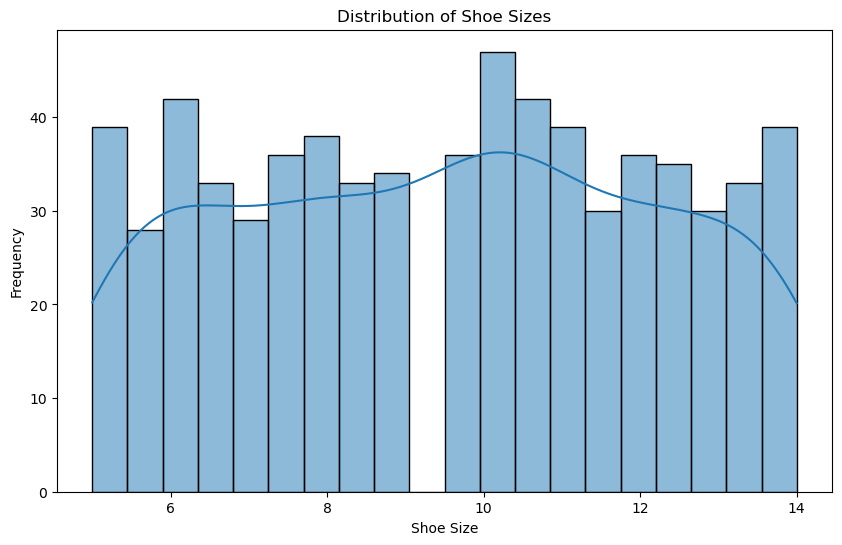

In [33]:
# Distribution of Shoe Sizes
plt.figure(figsize=(10,6))
sns.histplot(simulated_sales_df["Shoe Size"], bins=20, kde=True)
plt.title("Distribution of Shoe Sizes")
plt.xlabel("Shoe Size")
plt.ylabel("Frequency")
plt.show()

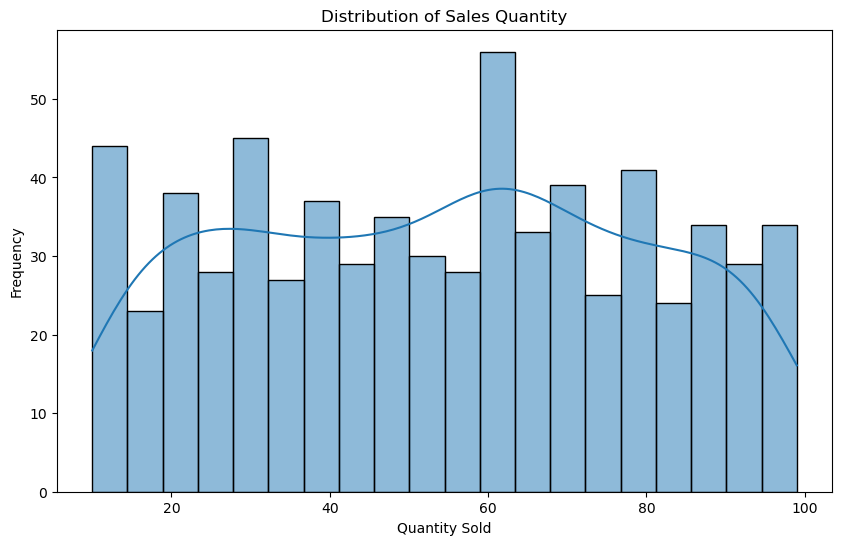

In [34]:
# Distribution of Sales Quantity
plt.figure(figsize=(10, 6))
sns.histplot(simulated_sales_df['Quantity Sold'], bins=20, kde=True)
plt.title("Distribution of Sales Quantity")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()

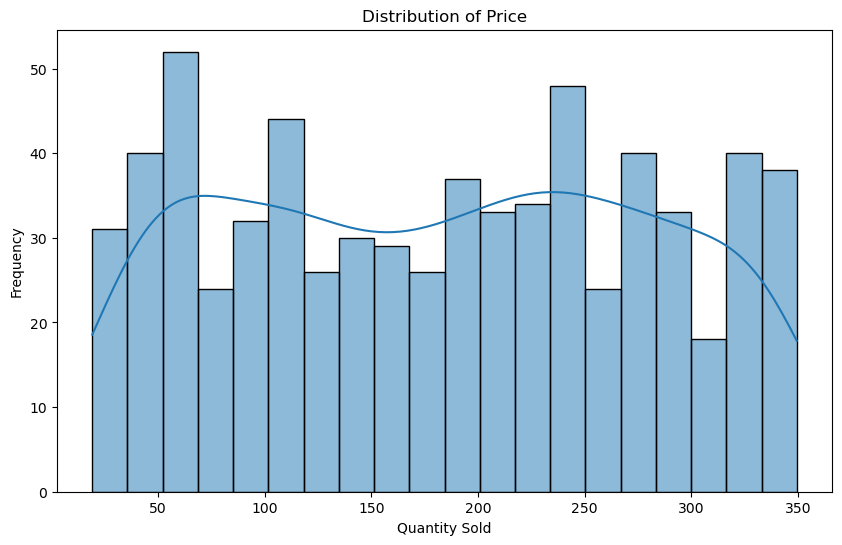

In [35]:
# Distribution of Price 
plt.figure(figsize=(10, 6))
sns.histplot(simulated_sales_df['Price'], bins=20, kde=True)
plt.title("Distribution of Price")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()

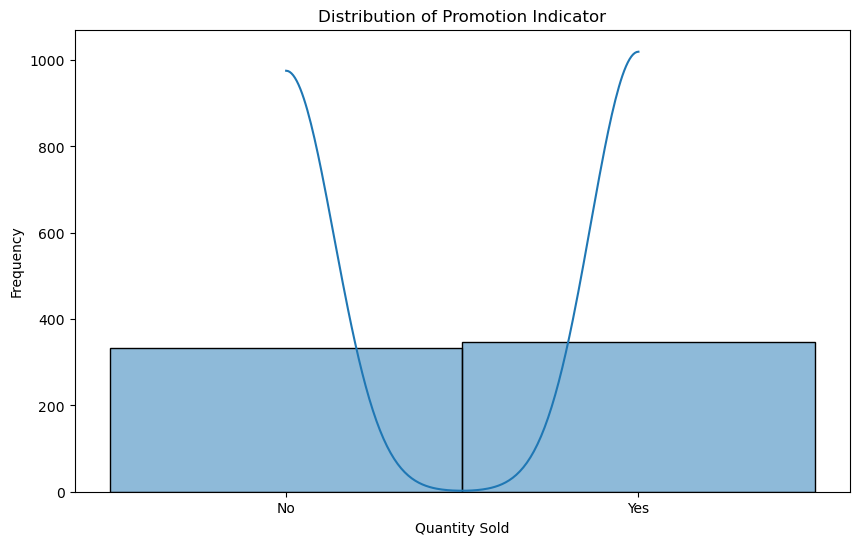

In [36]:
# Distribution of Promotion Indicator
plt.figure(figsize=(10, 6))
sns.histplot(simulated_sales_df['Promotion Indicator'], bins=2, kde=True)
plt.title("Distribution of Promotion Indicator")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()

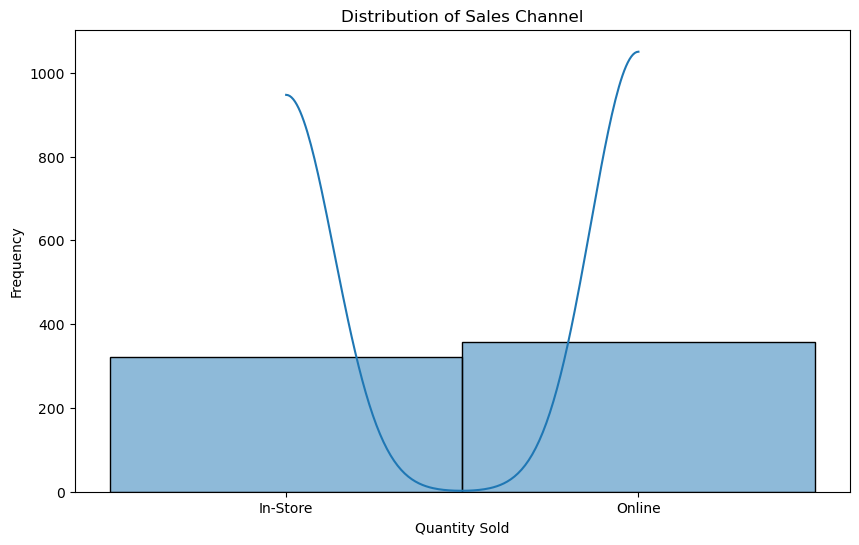

In [37]:
# Sales Channel
plt.figure(figsize=(10, 6))
sns.histplot(simulated_sales_df['Sales Channel'], bins=2, kde=True)
plt.title("Distribution of Sales Channel")
plt.xlabel("Quantity Sold")
plt.ylabel("Frequency")
plt.show()

In [38]:
groups = []
for group_name, group_data in simulated_sales_df.groupby('Sales Channel'):
    groups.append(group_data["Quantity Sold"])
f_statistic, p = f_oneway(*groups)
print("One-way ANOVA results - p-value:", p)

One-way ANOVA results - p-value: 0.2551222546042926


In [39]:
groups = []
for group_name, group_data in simulated_sales_df.groupby('Shoe Size'):
    groups.append(group_data["Quantity Sold"])
f_statistic, p = f_oneway(*groups)
print("One-way ANOVA results - p-value:", p)

One-way ANOVA results - p-value: 0.005204923735643889


In [40]:
groups = []
for group_name, group_data in simulated_sales_df.groupby('Promotion Indicator'):
    groups.append(group_data["Quantity Sold"])
f_statistic, p = f_oneway(*groups)
print("One-way ANOVA results - p-value:", p)

One-way ANOVA results - p-value: 0.7523919318341517


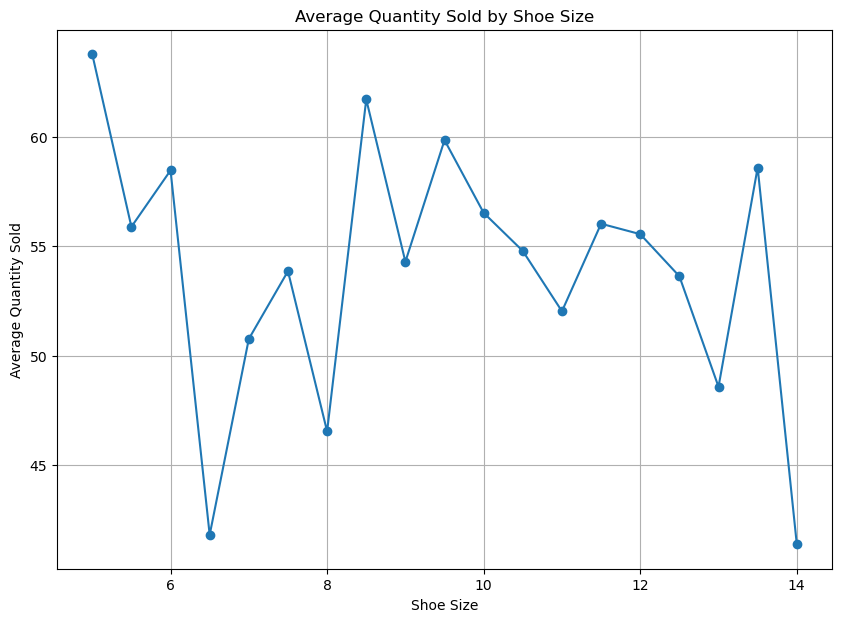

In [41]:
avg_quantity_sold_size = simulated_sales_df.groupby('Shoe Size')['Quantity Sold'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 7))
plt.plot(avg_quantity_sold_size['Shoe Size'], avg_quantity_sold_size['Quantity Sold'], marker='o', linestyle='-')
plt.title('Average Quantity Sold by Shoe Size')
plt.xlabel('Shoe Size')
plt.ylabel('Average Quantity Sold')
plt.grid(True)
plt.show()

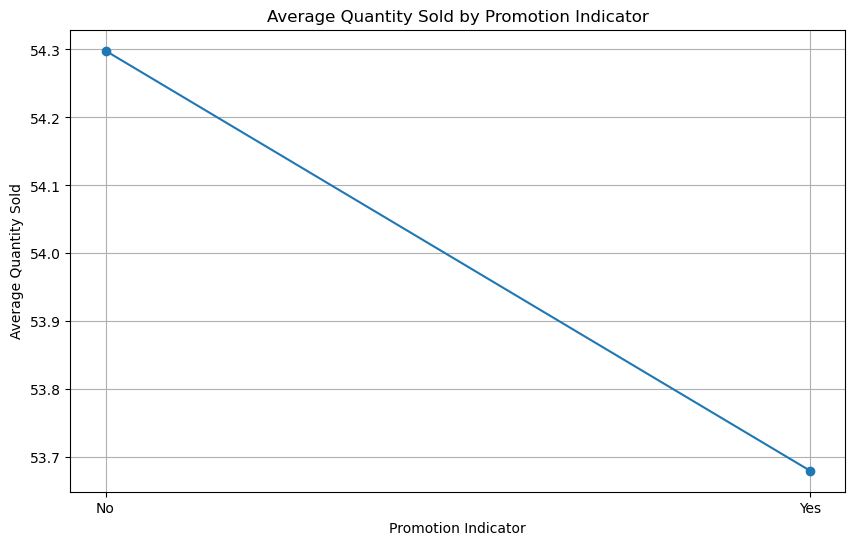

In [51]:
avg_quantity_sold_promo = simulated_sales_df.groupby('Promotion Indicator')['Quantity Sold'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 6))
plt.plot(avg_quantity_sold_promo['Promotion Indicator'], avg_quantity_sold_promo['Quantity Sold'], marker='o', linestyle='-')
plt.title('Average Quantity Sold by Promotion Indicator')
plt.xlabel('Promotion Indicator')
plt.ylabel('Average Quantity Sold')
plt.grid(True)
plt.show()

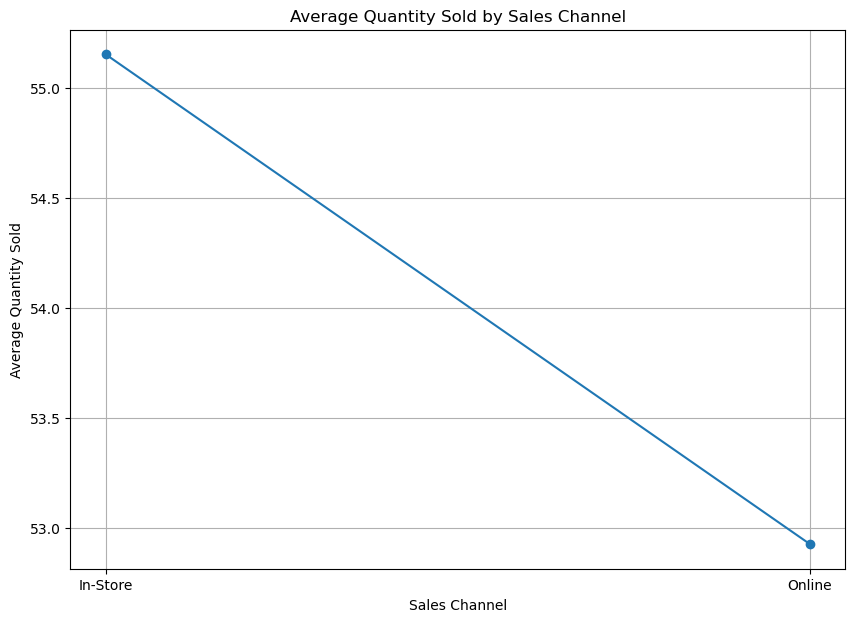

In [52]:
avg_quantity_sold_channel = simulated_sales_df.groupby('Sales Channel')['Quantity Sold'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 7))
plt.plot(avg_quantity_sold_channel['Sales Channel'], avg_quantity_sold_channel['Quantity Sold'], marker='o', linestyle='-')
plt.title('Average Quantity Sold by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Average Quantity Sold')
plt.grid(True)
plt.show()

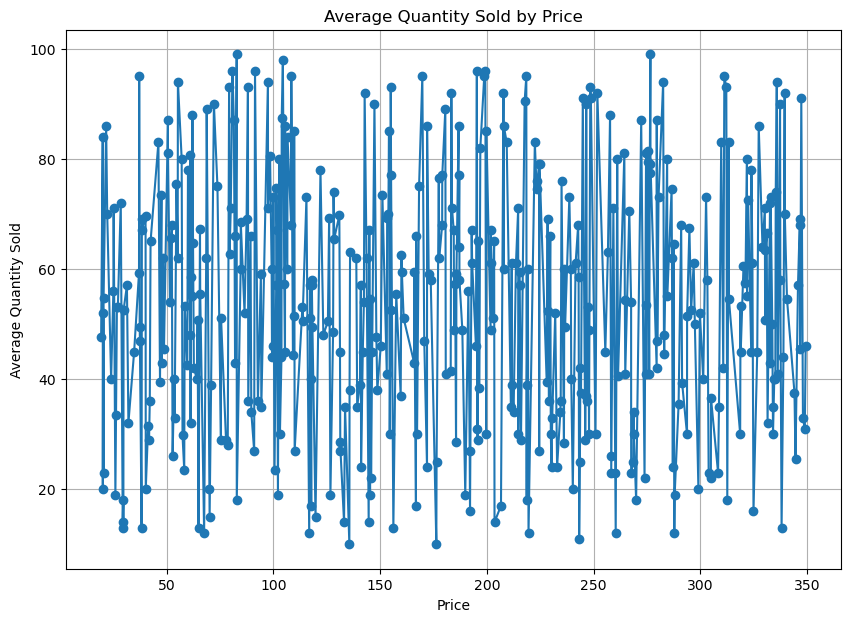

In [53]:
avg_quantity_sold_price = simulated_sales_df.groupby('Price')['Quantity Sold'].mean().reset_index()

# Plot the line graph
plt.figure(figsize=(10, 7))
plt.plot(avg_quantity_sold_price['Price'], avg_quantity_sold_price['Quantity Sold'], marker='o', linestyle='-')
plt.title('Average Quantity Sold by Price')
plt.xlabel('Price')
plt.ylabel('Average Quantity Sold')
plt.grid(True)
plt.show()

### Combined Associations and Relationships between Fields ###

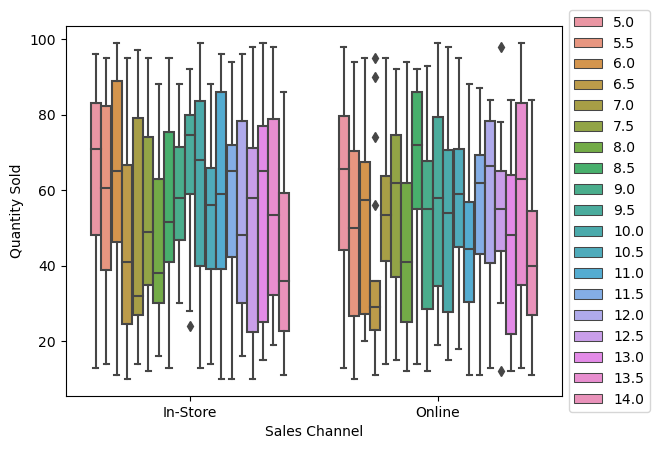

In [54]:
# Create the boxplot
sns.boxplot(x='Sales Channel', y='Quantity Sold', hue='Shoe Size', data=simulated_sales_df, dodge=0.5)

# Move the legend to the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

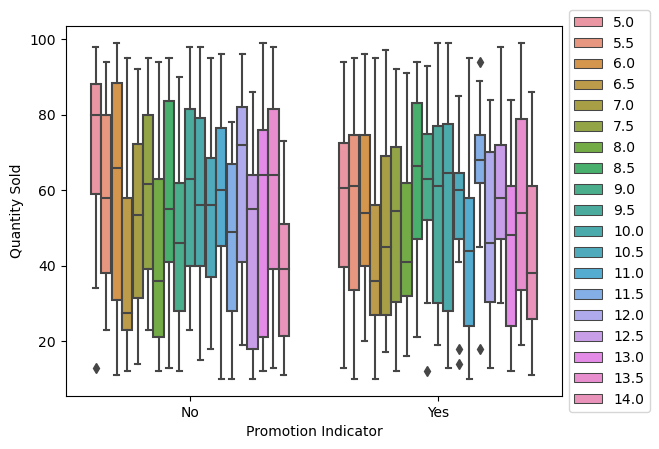

In [55]:
# Create the boxplot
sns.boxplot(x='Promotion Indicator', y='Quantity Sold', hue='Shoe Size', data=simulated_sales_df, dodge=0.5)

# Move the legend to the side
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show the plot
plt.show()

In [46]:
# Interaction between Sales Channel and Shoe Size for the sales volume in consideration. 
model = ols('Q("Quantity Sold") ~ C(Q("Promotion Indicator")) * C(Q("Shoe Size"))', data=simulated_sales_df).fit()
print(model.summary())
# the Prob (F-Statistic) of less than 0.05 indicates significance of overall model.In this case,
# there is a relationship between the independent variables (sales channel and shoe size) and dependent(quantity sold)

                            OLS Regression Results                            
Dep. Variable:     Q("Quantity Sold")   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     1.722
Date:                Sat, 20 Apr 2024   Prob (F-statistic):            0.00565
Time:                        11:29:08   Log-Likelihood:                -3129.6
No. Observations:                 679   AIC:                             6335.
Df Residuals:                     641   BIC:                             6507.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [47]:
# Interaction between Price and Shoe Size for the sales volume in consideration. 
# Define the regression formula
formula = 'Q("Quantity Sold") ~ Q("Price") + Q("Shoe Size")'

# Fit the regression model
model = ols(formula, data=simulated_sales_df).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     Q("Quantity Sold")   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.445
Date:                Sat, 20 Apr 2024   Prob (F-statistic):              0.236
Time:                        11:29:08   Log-Likelihood:                -3160.3
No. Observations:                 679   AIC:                             6327.
Df Residuals:                     676   BIC:                             6340.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         60.4611      4.041     14.

C:\Users\alira\AppData\Local\Temp\ipykernel_32412\2238383555.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="Shoe Size", y="Quantity Sold", hue="Promotion Indicator", data=simulated_sales_df, ci=None)


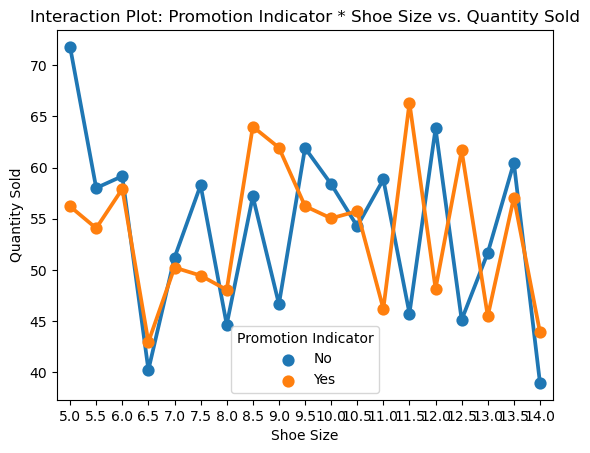

In [48]:
# Create interaction plot
sns.pointplot(x="Shoe Size", y="Quantity Sold", hue="Promotion Indicator", data=simulated_sales_df, ci=None)
plt.title('Interaction Plot: Promotion Indicator * Shoe Size vs. Quantity Sold')
plt.xlabel('Shoe Size')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\alira\AppData\Local\Temp\ipykernel_32412\3834535904.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x="Shoe Size", y="Quantity Sold", hue="Sales Channel", data=simulated_sales_df, ci=None)


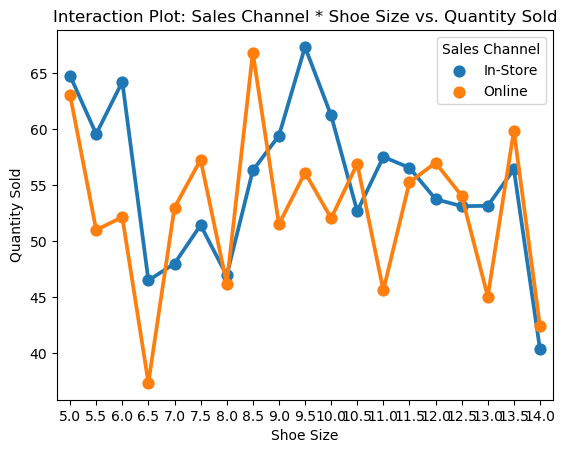

In [49]:
# Create interaction plot
sns.pointplot(x="Shoe Size", y="Quantity Sold", hue="Sales Channel", data=simulated_sales_df, ci=None)
plt.title('Interaction Plot: Sales Channel * Shoe Size vs. Quantity Sold')
plt.xlabel('Shoe Size')
plt.ylabel('Quantity Sold')
plt.show()

## Model Evaluation

##### Comparison of Input/Output Transformations

Comparing the transformations applied to input data with the transformations applied to output data

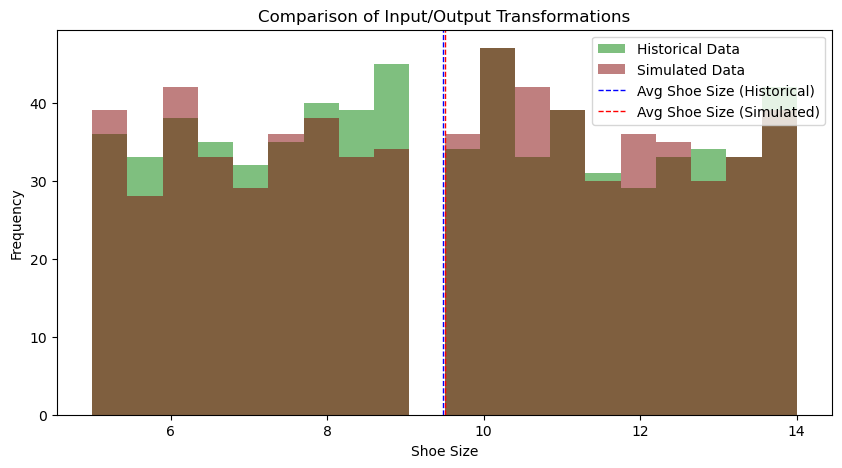

In [50]:
# Calculate average shoe size for historical data
avg_shoe_size_hist = data_raw['Shoe Size'].mean()

# Calculate average shoe size for simulated data
avg_shoe_size_sim = simulated_sales_df['Shoe Size'].mean()

# Plotting
plt.figure(figsize=(10, 5))

# Plot histogram of shoe sizes in historical data
plt.hist(data_raw['Shoe Size'], bins=20, color='green', alpha=0.5, label='Historical Data')

# Plot histogram of shoe sizes in simulated data
plt.hist(simulated_sales_df['Shoe Size'], bins=20, color='maroon', alpha=0.5, label='Simulated Data')

plt.axvline(avg_shoe_size_hist, color='blue', linestyle='dashed', linewidth=1, label='Avg Shoe Size (Historical)')
plt.axvline(avg_shoe_size_sim, color='red', linestyle='dashed', linewidth=1, label='Avg Shoe Size (Simulated)')

plt.xlabel('Shoe Size')
plt.ylabel('Frequency')
plt.title('Comparison of Input/Output Transformations')
plt.legend()
plt.show()

### Conclusion
To summarize, creating a simulation logic and model with analysis around the average shoe size and the impact of other variables on total sales requires methods of EDA, and statistical analysis such as one-way ANOVA and GLM. Finally, evaluating the model shortly using methodologies of "Comparison of Input/Output Transformations"